---
title: "Corner Solutions in Optimization Model"
subtitle: "Convex in Theory, but Non-Convex in Reality"
author: "GitSAM"
date: today
abstract: This notebook explores the corner solution problem in optimization theory, where theoretical convexity contrasts with real-world non-convexities. Through insightful examples, it demonstrates how economic and mathematical assumptions can diverge in practice.
keywords: corner solution, optimization, convex, non-convex
bibliography: references.bib
format:
  html:
    code-fold: true
    toc: true
jupyter: python3
---

### 1. Introduction

In standard economic theory, both consumer preferences and production sets are generally assumed to exhibit **convexity** [@ArrowDebreu1954; @Debreu1959]. This assumption supports foundational results, including the existence and uniqueness of equilibrium and the efficiency of market allocations. In practice, however, features such as **network externalities** [@KatzShapiro1985; @RochetTirole2003], **rent-seeking** [@ShleiferVishny1993], and **multiple equilibria**—often culminating in pronounced market dominance—can produce outcomes resembling **non-convex preferences** [@Arthur1994]. In many cases, corner solutions and path-dependent equilibria emerge from winner-takes-all dynamics, concentrated economic power, and barriers to entry.

### 2. Convexity in Economic Theory

**2.1 Convex Preferences and Production Sets**

- Consumer preferences are typically modeled with quasi-concave utility functions, yielding convex (or “bowl-shaped”) indifference curves. This setup implies a preference for **diversity** in consumption, rather than extreme or corner solutions [@Debreu1959].
- Producers are often assumed to face diminishing marginal returns, reflected in a **convex production possibility set**. Under such conditions, output expansions follow a predictable pattern, and average costs rise eventually.

**2.2 Existence and Efficiency of Equilibrium**

- With convexity, free market entry, symmetric information, and price-taking behavior, perfectly competitive markets are shown to possess a **stable equilibrium** that is **Pareto efficient** [@ArrowDebreu1954].
- These results typically rely on fixed-point theorems and the properties of convex sets, ensuring both the existence of equilibrium prices and (in many cases) uniqueness or stability [@Debreu1959].

**2.3 Normative Implications**

- Convexity underpins the normative stance that, absent significant market failures, competitive markets gravitate toward Pareto-efficient resource allocations.
- Consequently, government interventions usually aim to correct externalities, public goods issues, or information asymmetries within a broader context of largely convex preferences and production sets.


### 3. Non-Convexities in Reality

**3.1 Network Externalities and Increasing Returns to Scale**

- In contrast to diminishing returns, many digital or platform-based markets exhibit **network externalities**, or increasing returns to scale [@KatzShapiro1985; @RochetTirole2003]. As additional users join a platform, its value to each user grows, often driving **corner solutions** in both production and consumption.
- Instead of smoothly concave utility or production functions, certain markets feature segments of increasing marginal returns, leading to “winner-takes-all” or “winner-take-most” dynamics.

**3.2 Coordination Games and Multiple Equilibria**

- Network externalities commonly create **coordination games**, where each agent’s optimal choice depends on the choices of others. Small initial advantages or random shocks may tip the market toward a specific product or standard, resulting in **lock-in** [@Arthur1994].
- Such scenarios can produce **multiple Nash equilibria**, for instance everyone choosing Product A or everyone choosing Product B, with potentially large welfare differences between them.

**3.3 Extreme or Corner Solutions in Consumption and Production**

- With robust network effects, consumers or producers may converge on a single brand, platform, or location, effectively marginalizing other options—even if those alternatives might have been preferred under purely convex preferences.
- These **corner solutions** deviate from the classical idea that diversification in consumption and moderate scales in production yield optimal outcomes.

**3.4 Rent-Seeking and Incumbent Power**

- Dominant firms or groups can exploit **political influence**—through lobbying or regulatory capture—to fortify their positions, reinforcing non-convex outcomes by stifling competition [@Tirole1988; @ShleiferVishny1993].
- **Rent-seeking** intensifies the misallocation of resources, as efforts are diverted to defending or reinforcing incumbents’ power, often via barriers to entry, reduced competition, and growing inequalities.

### 4. Government Interventions

**4.1 Theoretical View: Correcting Market Imperfections**

- Traditionally, policy interventions focus on addressing market failures, assuming that preferences and technologies remain fundamentally convex and that interventions are limited and transparent.

**4.2 Empirical Evidence: Policy Amplifies Non-Convexities**

- In reality, incumbents can wield outsized influence through **lobbying** and **political capture**, prompting policies that strengthen market concentration [@Tirole1988].
- Instead of fostering genuinely competitive markets, such policies may lock in non-convex outcomes, creating a **vicious cycle** of entrenched monopolistic power and limited competition.

**4.3 Lock-in and Path Dependence**

- When policy-making aligns with incumbent interests, even minor advantages can become self-reinforcing [@Arthur1994].
- Consequently, once a market tips toward a specific firm, region, or product, effective competition may prove infeasible without sweeping policy reforms or disruptive innovation.


### 5. Conclusion

Although classical economic models lean on **convex** preferences and technologies to assert the existence of unique, efficient equilibria, real-world dynamics often revolve around **non-convex** phenomena. Network externalities, coordination failures, and rent-seeking can drive **corner solutions**, multiple equilibria, and **lock-in** that preserve incumbent advantages. Far from mitigating these issues, government policies sometimes exacerbate them through preferential treatment of dominant actors. Recognizing these **non-convex realities** is crucial for crafting policy frameworks that transcend purely theoretical assumptions of convexity and address the path-dependent complexity characterizing modern markets.


### Appendix: Utilitarian Objective function

Extreme Point (x, y, z): 10.0 0.5 1.9952623149688795
Extreme Point Type: Saddle


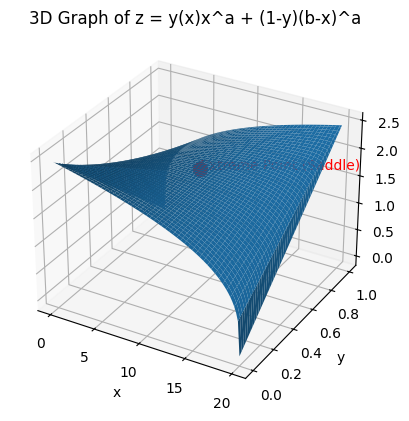

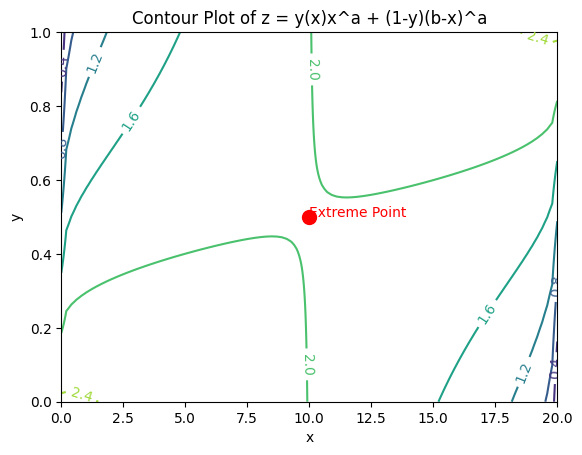

In [1]:
#@title Utilitarian objective function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# 함수 정의
def z_function(x, y, a, b):
  return y * (x**a) + (1 - y) * ((b - x)**a)

# x, y 범위 및 매개변수 설정
a = 0.3  # 매개변수 a 값 (0과 1 사이)
b = 20  # 매개변수 b 값

x = np.linspace(0, b, 100)  # x 범위: 0부터 20까지 100개의 점
y = np.linspace(0, 1, 100)  # y 범위: 0부터 1까지 100개의 점
X, Y = np.meshgrid(x, y)  # x, y 좌표 격자 생성


# Z 값 계산
Z = z_function(X, Y, a, b)


def negative_z_function(params):
    x, y = params
    return -z_function(x, y, a, b)  # 최솟값을 찾기 위해 음수 값 반환

# 초기값 설정 (interior 범위 내)
initial_guess = [b / 2, 0.5]

# 경계 조건 설정
bounds = [(0, b), (0, 1)]

# 최적화 실행
result = minimize(negative_z_function, initial_guess, bounds=bounds)

# 결과 추출
extreme_point_x, extreme_point_y = result.x
extreme_point_z = z_function(extreme_point_x, extreme_point_y, a, b)

print("Extreme Point (x, y, z):", extreme_point_x, extreme_point_y, extreme_point_z)

# Calculate Hessian matrix
def hessian_matrix(x, y, a, b):
  """Calculates the Hessian matrix of the z_function."""
  d2z_dx2 = a * (a - 1) * (y * (x**(a - 2)) + (1 - y) * ((b - x)**(a - 2)))
  d2z_dy2 = 0  # Second derivative with respect to y is 0
  d2z_dxdy = a * (x**(a - 1) - (b - x)**(a - 1))
  d2z_dydx = d2z_dxdy  # Mixed partial derivatives are equal

  return [[d2z_dx2, d2z_dxdy], [d2z_dydx, d2z_dy2]]

# Determine the type of extreme point
hessian = hessian_matrix(extreme_point_x, extreme_point_y, a, b)
determinant = np.linalg.det(hessian)

if determinant > 0 and hessian[0][0] > 0:
  extreme_type = "Minimum"
elif determinant > 0 and hessian[0][0] < 0:
  extreme_type = "Maximum"
else:
  extreme_type = "Saddle"

print("Extreme Point Type:", extreme_type)


# 3D 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Graph of z = y*x^a + (1-y)(b-x)^a')


# global interior extreme point 표시
ax.scatter(extreme_point_x, extreme_point_y, extreme_point_z, color='red', marker='o', s=100)
ax.text(extreme_point_x, extreme_point_y, extreme_point_z, f'Extreme Point ({extreme_type})', color='red')

plt.show()

# Contour Plot 그리기
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Contour Plot of z = y*x^a + (1-y)(b-x)^a')
plt.clabel(contour, inline=1, fontsize=10)

# global interior extreme point 표시
ax.scatter(extreme_point_x, extreme_point_y, color='red', marker='o', s=100)
ax.text(extreme_point_x, extreme_point_y, 'Extreme Point', color='red')

plt.show()

### Appendix: Homogeneous function of degree 1

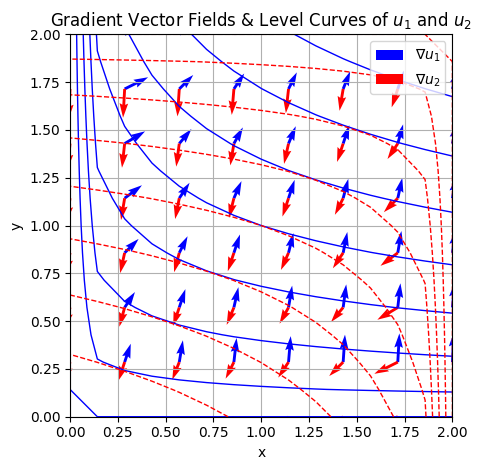

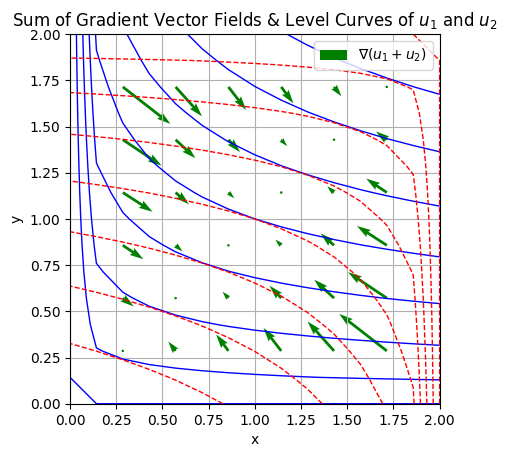

In [3]:
# Define a return to scale
scale = 1 # Constant return to scale, i.e. Homogeneous function of degree 1

# Define parameter a
a = 1/4

# total wealth of x
k_x = 2
# total wealth of y
k_y = 2

import numpy as np
import matplotlib.pyplot as plt

# 경고 메시지 숨기기
np.seterr(invalid='ignore')

def numerical_derivative(f, X, Y, h=1e-5):
    """ Compute numerical partial derivatives using central difference method."""
    dfdx = (f(X + h, Y) - f(X - h, Y)) / (2 * h)  # ∂f/∂x
    dfdy = (f(X, Y + h) - f(X, Y - h)) / (2 * h)  # ∂f/∂y
    return dfdx, dfdy

# Define functions u_1(x,y) = x^a * y^(1-a) and u_2(x,y) = (2-x)(2-y)
def u1(x, y):
    return x**(scale*a) * y**(scale*(1-a))

def u2(x, y):
    return (k_x - x)**(scale*a) * (k_y - y)**(scale*(1-a))

# Define the grid
x = np.linspace(0, k_x, 15)
y = np.linspace(0, k_y, 15)
X, Y = np.meshgrid(x, y)

# Compute the numerical derivatives (vector field components)
U1, V1 = numerical_derivative(u1, X, Y)
U2, V2 = numerical_derivative(u2, X, Y)

# Reduce the density of vectors for better visualization
x_sparse = np.linspace(0, k_x, 8)
y_sparse = np.linspace(0, k_y, 8)
X_sparse, Y_sparse = np.meshgrid(x_sparse, y_sparse)
U1_sparse, V1_sparse = numerical_derivative(u1, X_sparse, Y_sparse)
U2_sparse, V2_sparse = numerical_derivative(u2, X_sparse, Y_sparse)

# Plot the combined vector fields and contour plots
#plt.figure(figsize=(8, 8))

# Contour plots of u_1 and u_2 (level curves only)
contour1 = plt.contour(X, Y, u1(X, Y), colors='blue', linestyles='solid', linewidths=1)
contour2 = plt.contour(X, Y, u2(X, Y), colors='red', linestyles='dashed', linewidths=1)

# Overlay vector fields
plt.quiver(X_sparse, Y_sparse, U1_sparse, V1_sparse, color='b', angles='xy', label='∇$u_1$')
plt.quiver(X_sparse, Y_sparse, U2_sparse, V2_sparse, color='r', angles='xy', label='∇$u_2$')

# Labels and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Vector Fields & Level Curves of $u_1$ and $u_2$')
plt.legend()
plt.grid('scaled')
plt.axis('square')

plt.tight_layout()
# Show the plot
plt.show()

# Compute the sum of gradients
U_sum = U1 + U2
V_sum = V1 + V2

# Reduce the density of vectors for better visualization
U_sum_sparse, V_sum_sparse = numerical_derivative(lambda x, y: u1(x, y) + u2(x, y), X_sparse, Y_sparse)

# Plot the combined vector fields and contour plots
#plt.figure(figsize=(8, 8))

# Contour plots of u_1 and u_2 (level curves only)
contour1 = plt.contour(X, Y, u1(X, Y), colors='blue', linestyles='solid', linewidths=1)
contour2 = plt.contour(X, Y, u2(X, Y), colors='red', linestyles='dashed', linewidths=1)

# Overlay sum of gradient vector fields
plt.quiver(X_sparse, Y_sparse, U_sum_sparse, V_sum_sparse, color='g', angles='xy', label='∇($u_1 + u_2$)')

# Labels and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sum of Gradient Vector Fields & Level Curves of $u_1$ and $u_2$')
plt.legend()

plt.grid('scaled')
plt.axis('square')
# Show the plot
plt.show()


### Appendix: Sigmoid utility function

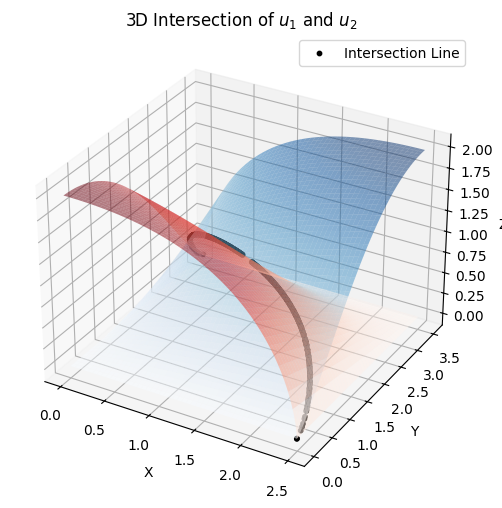

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
kx = (np.pi**3 / 2) ** (1/3)
ky = (2**(1/2)) * ((np.pi**3 / 2) ** (1/3))

# Define the grid
x = np.linspace(0, kx, 1000)
y = np.linspace(0, ky, 1000)
X, Y = np.meshgrid(x, y)

# Define the functions
u1 = 1 - np.cos(X**(1/3) * Y**(2/3))
u2 = 1 - np.cos((kx - X)**(1/3) * (ky - Y)**(2/3))

# Find intersection points where u1 == u2
threshold = 1e-3  # Numerical tolerance for equality
intersection_mask = np.abs(u1 - u2) < threshold
X_intersect = X[intersection_mask]
Y_intersect = Y[intersection_mask]
Z_intersect = u1[intersection_mask]  # u1 and u2 are nearly equal

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot intersection line
ax.scatter(X_intersect, Y_intersect, Z_intersect, color='black', s=10, label='Intersection Line')

# Surface plots for reference
ax.plot_surface(X, Y, u1, cmap='Blues', alpha=0.5)
ax.plot_surface(X, Y, u2, cmap='Reds', alpha=0.5)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Intersection of $u_1$ and $u_2$')
ax.legend()

plt.show()